<a href="https://colab.research.google.com/github/Enamul-Hoq/Applied-Deep-Learning/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [11]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
print("x_train.shape:",x_train.shape)

x_train.shape: (60000, 28, 28)


In [12]:
#As the data is only 2D than is why for CNN we need to make it 3D channels
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train.shape:",x_train.shape)

x_train.shape: (60000, 28, 28, 1)


In [13]:
# K is the number of classes|| number of unique elements
K = len(set(y_train))
print("K is the number of classes = ",K)

K is the number of classes =  10


In [14]:
# Building the CNN model. This model is for the single input and a single output 
i = Input(shape = x_train[0].shape)
x = Conv2D(32, (3,3), strides= 2, activation = 'relu')(i)
x = Conv2D(64, (3,3), strides= 2, activation = 'relu')(x)
x = Conv2D(128, (3,3), strides= 2, activation = 'relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = 'softmax')(x)
model = Model(i,x)


In [15]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs= 15)

Epoch 1/15
1875/1875 [==============================] - 11s 5ms/step - loss: 0.5225 - accuracy: 0.8073 - val_loss: 0.3995 - val_accuracy: 0.8507
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3537 - accuracy: 0.8679 - val_loss: 0.3599 - val_accuracy: 0.8676
Epoch 3/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3052 - accuracy: 0.8862 - val_loss: 0.3155 - val_accuracy: 0.8826
Epoch 4/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2714 - accuracy: 0.8996 - val_loss: 0.2933 - val_accuracy: 0.8904
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2484 - accuracy: 0.9058 - val_loss: 0.2908 - val_accuracy: 0.8920
Epoch 6/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2268 - accuracy: 0.9147 - val_loss: 0.3087 - val_accuracy: 0.8896
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2109 - accuracy: 0.9204 - val_loss: 0.2914 - val_accurac

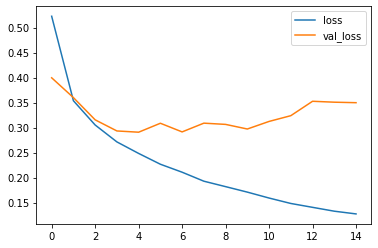

In [17]:
#Plotting the loss per iteration 
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

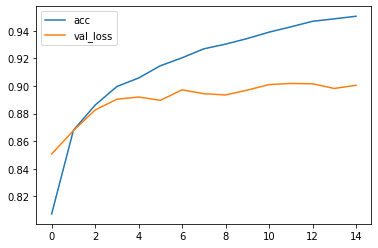

In [18]:
# Plotting accuracy per iteration 
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_loss')
plt.legend()

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[799   2  39  17   4   1 123   0  14   1]
 [  1 983   0  10   2   0   1   0   3   0]
 [ 12   0 880   9  42   0  54   0   3   0]
 [ 14  14  20 897  31   0  20   1   3   0]
 [  0   2  59  25 831   0  83   0   0   0]
 [  0   0   0   0   1 958   0  22   0  19]
 [ 72   0  64  24  90   0 737   0  13   0]
 [  0   0   0   0   0   3   0 969   1  27]
 [  2   0   5   0   4   1   5   1 981   1]
 [  1   0   0   0   0   3   0  26   0 970]]


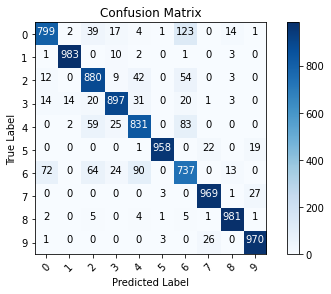

In [23]:
from prompt_toolkit.layout import HorizontalAlign
# Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion Matrix',
                          cmap = plt.cm.Blues):
  
  if normalize:
    cm = cm.astype('float')/ cm.sum(axis = 1)[:, np.newaxis]
    print("Normalized confusion matix")
  else:
    print('Confusion matrix, without normalization')
  print(cm)

  plt.imshow(cm, interpolation = 'nearest', cmap= cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i,j],fmt),
             horizontalalignment = 'center',
             color = 'white' if cm[i,j]> thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel("Predicted Label")
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm, list(range(10)))

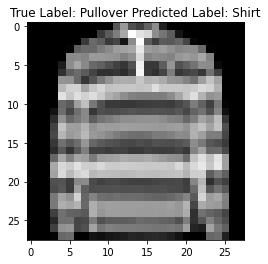

In [32]:
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap = 'gray')
plt.title("True Label: %s Predicted Label: %s" %(labels[y_test[i]], labels[p_test[i]]));
